# Assignment 2(due on 11/08)

## Student:郭悦怡（12332285），Gtihub：YueyiGuo
## 批改人：张鹏

## 得分：44/50

### 1 Significant earthquakes since 2150 B.C.

In [37]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

# Load the data
Sig_Eqs = pd.read_csv('earthquakes-2023-11-01_21-34-28_+0800.tsv',sep='\t') 
Sig_Eqs


,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,NaN,10708.0,2023.0,10.0,7.0,6.0,41.0,3.0,NaN,NaN,...,NaN,NaN,1950.0,4.0,NaN,3.0,2862.0,4.0,250.0,3.0
6395,NaN,10711.0,2023.0,10.0,7.0,8.0,40.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,200.0,3.0,NaN,2.0
6396,NaN,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6397,NaN,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,...,NaN,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN


In [38]:
#1.1
# Group the data by country, calculate total deaths in all country
# and sort them in descending order
sig_deaths10 = Sig_Eqs.groupby(['Country']).sum('Total Deaths').sort_values("Total Deaths",ascending=False).head(10)
print("The top ten countries along with the total number of deaths: ")
sig_deaths10['Total Deaths']

The top ten countries along with the total number of deaths: 


Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

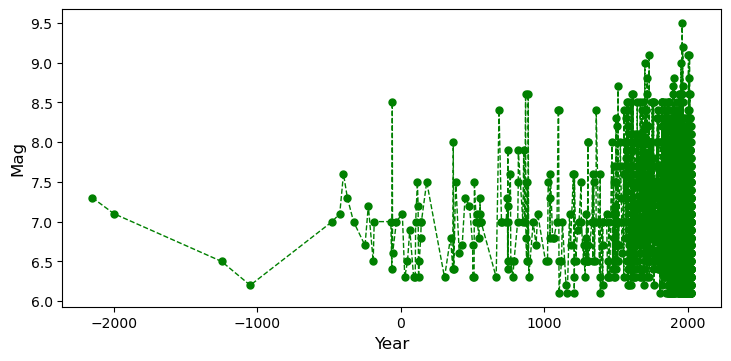

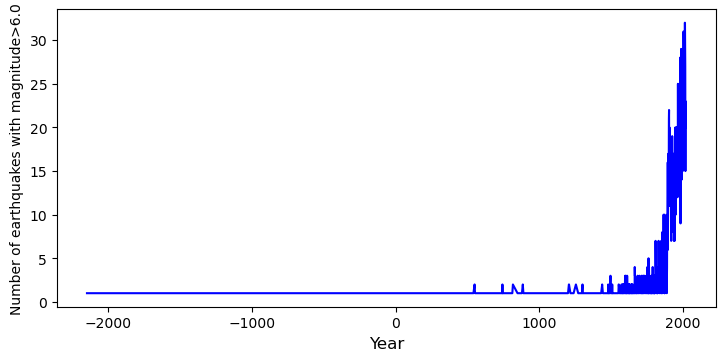

In [39]:
#1.2
Sig_Eqs[Sig_Eqs['Mag']>6.0]['Id'].count()



sig_eqs_ex6 = Sig_Eqs[Sig_Eqs['Mag']>6.0][['Year','Mag']]
sig_eqs_ex6


# Given data in the x and y directions
x=sig_eqs_ex6["Year"]
y=sig_eqs_ex6["Mag"]

# Count the number of earthquakes with magnitude larger than 6.0 each year
eq_count=Sig_Eqs[Sig_Eqs['Mag']>6.0].groupby('Year').size() 

# Plot figure1()
plt.figure(figsize=(8.5, 8.5))
plt.subplot(2,1,1)
plt.plot(x,y,'go--',linewidth=1,markersize=5)
plt.xlabel("Year",size=12)
plt.ylabel("Mag",size=12)
plt.show()

# Plot figure2()
plt.figure(figsize=(8.5, 8.5))
plt.subplot(2,1,2)
plt.plot(eq_count.index, eq_count.values,'b-')    # Plot the time series
plt.xlabel('Year',size=12)
plt.ylabel('Number of earthquakes with magnitude>6.0',size=10)

plt.show()

In [40]:
#1.3
def CountEq_LargestEq(COUNTRY,Sig_Eqs):
    country_eqs = Sig_Eqs[Sig_Eqs['Country'] == COUNTRY]   
    total_eqs = len(country_eqs)    #Calculate the total number of earthquakes in given country
    if total_eqs == 0:
        return total_eqs, None
    else:
        #Find the date of the largest earthquake in given country
        largest_eq_date = country_eqs[['Year','Mo','Dy','Mag']].sort_values('Mag',ascending=False).head(1)
    return total_eqs, largest_eq_date


CountEq_LargestEq('CHINA',Sig_Eqs)

# Apply function to each country
results = Sig_Eqs.groupby('Country').apply(lambda x: CountEq_LargestEq(x['Country'].iloc[0], x))

# Sort results in descending order
results.sort_values('total_eqs', ascending=False, inplace=True)

print(results)

TypeError: Series.sort_values() takes 1 positional argument but 2 positional arguments (and 2 keyword-only arguments) were given

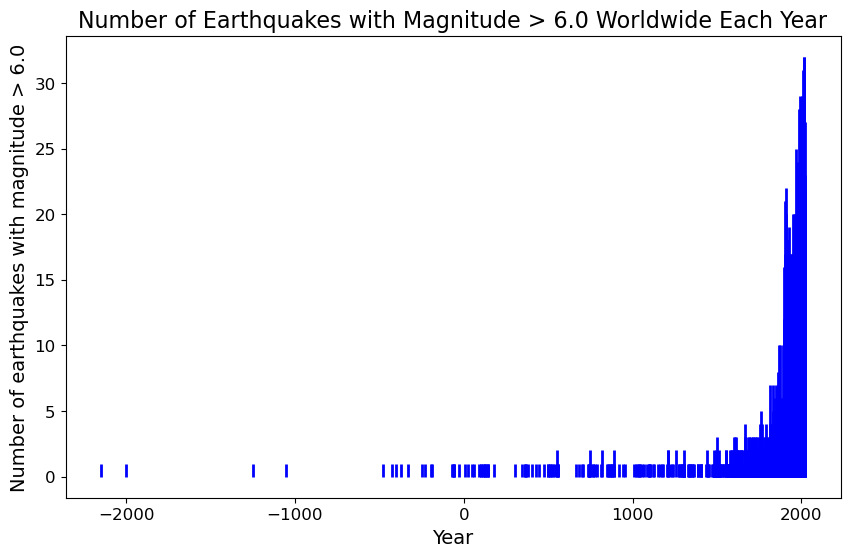

In [51]:
#1.2 助教添加
# 筛选出震级大于6.0的地震
large_quakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

In [41]:
#1.3 助教添加
df2 = Sig_Eqs.loc[:,['Country','Mag','Year','Mo','Dy']]
country_list = df2['Country'].unique()

df2['cYear'] = df2['Year'].astype(str)
df2['cMo'] = df2['Mo'].astype(str)
df2['cDy'] = df2['Dy'].astype(str)

df2['cMo'][df2['Mo'] < 10] = '0' + df2['cMo'].astype(str)
df2['cDy'][df2['Dy'] < 10] = '0' + df2['cDy'].astype(str)

df2['DATE'] = df2['cYear'] + '/' + df2['cMo'] + '/' + df2['cDy']

re=pd.DataFrame(columns=['Country','Mag','DATE'])

def CountEq_LargestEq(i):
    df3 = df2[df2['Country'] == str(i)]
    df4 = df3[df3['Mag']==df3['Mag'].max()][['Country','Mag','DATE']] 
    df4['total_number'] = df2[df2['Country'] == str(i)]['Country'].count()
    global re
    re = pd.concat([re, df4], ignore_index=True)
    
for k in country_list:
    CountEq_LargestEq(k)
    
re = re.sort_values('total_number',ascending=False,ignore_index=True)

re

/tmp/ipykernel_406564/1027521480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cMo'][df2['Mo'] < 10] = '0' + df2['cMo'].astype(str)
/tmp/ipykernel_406564/1027521480.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cDy'][df2['Dy'] < 10] = '0' + df2['cDy'].astype(str)


,Country,Mag,DATE,total_number
0,CHINA,8.5,1668.0/07.0/25.0,620.0
1,JAPAN,9.1,2011.0/03.0/11.0,414.0
2,INDONESIA,9.1,2004.0/12.0/26.0,411.0
3,IRAN,7.9,856.0/12.0/22.0,384.0
4,TURKEY,7.8,2023.0/02.0/06.0,335.0
...,...,...,...,...
164,CENTRAL AFRICAN REPUBLIC,4.8,1921.0/09.0/16.0,1.0
165,NORWAY,5.8,1819.0/08.0/31.0,1.0
166,PALAU,7.6,1914.0/10.0/23.0,1.0
167,FRENCH POLYNESIA,6.5,1848.0/07.0/12.0,1.0


### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析。第二问绘图有一点点问题，建议绘制竖线图。请注意上传代码原始数据，同时第三小题需要补充针对 Apply CountEq_LargestEq to every country in the file, report your results in a descending order.作出回答。
### 建议使用循环语句来计算每个国家地震次数并排序，助教添加代码仅供参考


### 得分：22/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

/tmp/ipykernel_406564/1383626435.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  sz_df = pd.read_csv('2281305.csv')


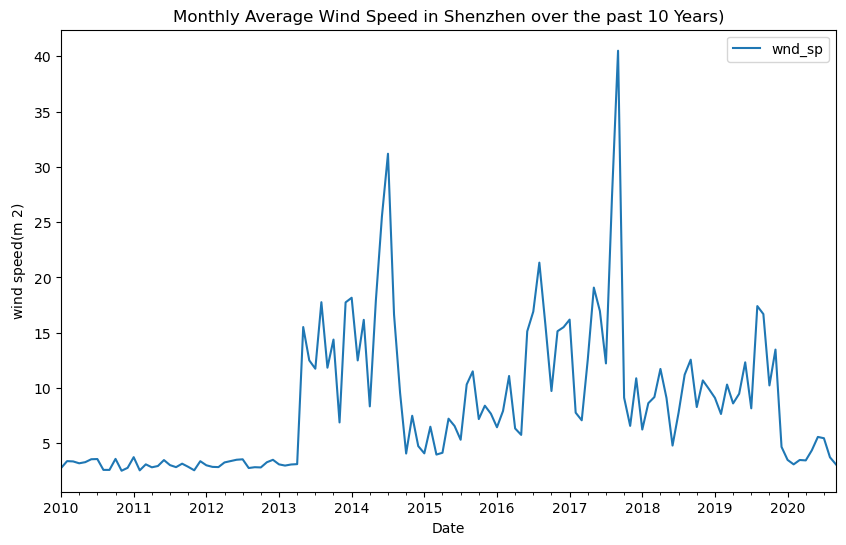

In [48]:
sz_df = pd.read_csv('2281305.csv')

#Separate the WND columns with commas to form multiple columns of wind related data.
sz_df_wnd = sz_df['WND'].str.split(',',expand=True)   
sz_df_wnd.columns = ['agl','aglq','wnd_ty','wnd_sp','wndq']
sz_df = pd.concat([sz_df,sz_df_wnd], axis=1)
sz_df = sz_df.drop('WND',axis=1)
sz_df['wnd_sp'] = sz_df['wnd_sp'].str.slice(0, 5).astype(float)

# Filter the data
sz_df = sz_df.loc[sz_df_wnd['wnd_sp'] != 9999]

# Convert date to datetime
sz_df['DATE'] = pd.to_datetime(sz_df['DATE'], format="%Y-%m-%dT%H:%M:%S")
sz_df=sz_df[['DATE','agl','aglq','wnd_ty','wnd_sp','wndq']]
sz_df['YYYY-MM']=sz_df['DATE'].dt.to_period('M')

# Calculate monthly average wind speed
wnd_mon=sz_df[['YYYY-MM','wnd_sp']].groupby(['YYYY-MM']).mean() /10
wnd_mon

# Plot the data
plt.figure(figsize=(10, 6))
wnd_mon['wnd_sp'].plot()
plt.xlabel('Date')
plt.ylabel('wind speed(m$~2$)')
plt.title('Monthly Average Wind Speed in Shenzhen over the past 10 Years)')
plt.legend()
plt.show()

In [35]:
#源代码
sz_df = sz_df.loc[sz_df_wnd['wnd_sp'] != 9999]
sz_df['wnd_sp'][sz_df['wnd_sp']==9999]

29394     9999.0
29398     9999.0
29582     9999.0
29606     9999.0
29726     9999.0
           ...  
104321    9999.0
104463    9999.0
104471    9999.0
104513    9999.0
105135    9999.0
Name: wnd_sp, Length: 638, dtype: float64

In [36]:
#助教修改 应该选择sz_df['wnd_sp'] != 9999筛选
sz_df = sz_df.loc[sz_df['wnd_sp'] != 9999]
sz_df['wnd_sp'][sz_df['wnd_sp']==9999]

Series([], Name: wnd_sp, dtype: object)

/tmp/ipykernel_406564/4011882233.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  sz_df = pd.read_csv('2281305.csv')


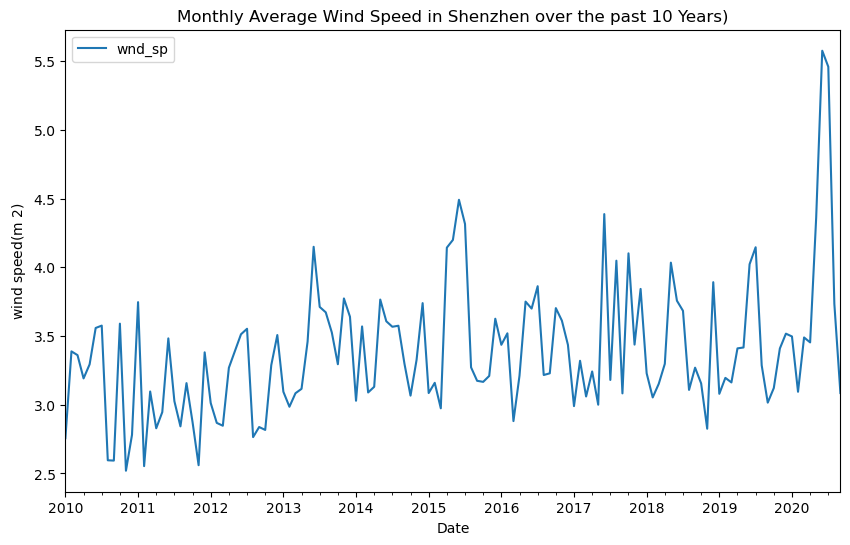

In [50]:
#助教修改后
sz_df = pd.read_csv('2281305.csv')

#Separate the WND columns with commas to form multiple columns of wind related data.
sz_df_wnd = sz_df['WND'].str.split(',',expand=True)   
sz_df_wnd.columns = ['agl','aglq','wnd_ty','wnd_sp','wndq']
sz_df = pd.concat([sz_df,sz_df_wnd], axis=1)
sz_df = sz_df.drop('WND',axis=1)
sz_df['wnd_sp'] = sz_df['wnd_sp'].str.slice(0, 5).astype(float)

# Filter the data
sz_df = sz_df.loc[sz_df['wnd_sp'] != 9999]

# Convert date to datetime
sz_df['DATE'] = pd.to_datetime(sz_df['DATE'], format="%Y-%m-%dT%H:%M:%S")
sz_df=sz_df[['DATE','agl','aglq','wnd_ty','wnd_sp','wndq']]
sz_df['YYYY-MM']=sz_df['DATE'].dt.to_period('M')

# Calculate monthly average wind speed
wnd_mon=sz_df[['YYYY-MM','wnd_sp']].groupby(['YYYY-MM']).mean() /10
wnd_mon

# Plot the data
plt.figure(figsize=(10, 6))
wnd_mon['wnd_sp'].plot()
plt.xlabel('Date')
plt.ylabel('wind speed(m$~2$)')
plt.title('Monthly Average Wind Speed in Shenzhen over the past 10 Years)')
plt.legend()
plt.show()

### 第二题代码运行正常，可以输出，但是结果部分月均风速变化太大不符合常理，这其中的问题很可能是没有对数据进行清洗造成的。没有针对 Is there a trend in monthly averaged wind speed within the past 10 years? 这个问题进行回答。

### 得分8/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

In [17]:
#3.1
# Load file
bj_df = pd.read_csv('54511099999.csv')

#Separate the TMP columns with commas to form multiple columns of air temperature related data.
bj_tmp = bj_df['TMP'].str.split(',',expand=True)
bj_tmp.columns = ['tmp','tmpq']
bj_df = pd.concat([bj_df,bj_tmp], axis=1)
bj_df = bj_df.drop('TMP',axis=1)
bj_df['tmp'] = bj_df['tmp'].str.slice(0, 5).astype(float)

# Filter the data
bj_df = bj_df.loc[bj_df['tmp'] != 9999]
bj_df

/tmp/ipykernel_403041/1625131784.py:3: DtypeWarning: Columns (19,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  bj_df = pd.read_csv('54511099999.csv')


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,MA1,MD1,MW1,MW2,OC1,OD1,REM,EQD,tmp,tmpq
0,54511099999,2022-01-01T00:00:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-12,99999,V020,...,"99999,9,10211,1","7,1,003,1,-093,1","05,1",NaN,NaN,"4,12,0024,1,034",SYN004BUFR,NaN,-64.0,1
1,54511099999,2022-01-01T00:00:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10250,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET054METAR ZBAA 010000Z 32001MPS CAVOK M08/M1...,NaN,-80.0,1
2,54511099999,2022-01-01T00:30:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10250,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET054METAR ZBAA 010030Z 33001MPS CAVOK M05/M0...,NaN,-50.0,1
3,54511099999,2022-01-01T01:00:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10260,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET054METAR ZBAA 010100Z 33002MPS CAVOK M02/M0...,NaN,-20.0,1
4,54511099999,2022-01-01T01:30:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10260,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET062METAR ZBAA 010130Z 33002MPS 280V350 CAVO...,NaN,-20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20242,54511099999,2022-12-31T21:30:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10350,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET054METAR ZBAA 312130Z 34001MPS CAVOK M07/M1...,NaN,-70.0,1
20243,54511099999,2022-12-31T22:00:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10350,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET054METAR ZBAA 312200Z VRB01MPS CAVOK M11/M1...,NaN,-110.0,1
20244,54511099999,2022-12-31T22:30:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10350,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET054METAR ZBAA 312230Z 31001MPS CAVOK M11/M1...,NaN,-110.0,1
20245,54511099999,2022-12-31T23:00:00,4,40.080111,116.584556,35.35,"BEIJING CAPITAL INTERNATIONAL AIRPORT, CH",FM-15,99999,V020,...,"10360,1,99999,9",NaN,NaN,NaN,NaN,NaN,MET054METAR ZBAA 312300Z 34002MPS CAVOK M12/M1...,NaN,-120.0,1


In [18]:
#3.2
# Calculate the monthly average temperature in Beijing based on time series
# Convert date to datetime
bj_df['DATE'] = pd.to_datetime(bj_df['DATE'], format="%Y-%m-%dT%H:%M:%S")
bj_df[["DATE","tmp","tmpq"]]
bj_df['YYYY-MM']=bj_df['DATE'].dt.to_period('M')
# Calculate monthly average air temperature
tmp_mon=bj_df[['YYYY-MM','tmp']].groupby(['YYYY-MM']).mean()
tmp_mon


,tmp
YYYY-MM,
2022-01,-27.235294
2022-02,-14.385403
2022-03,69.688259
2022-04,158.912965
2022-05,209.242915
2022-06,253.907840
2022-07,273.321965
2022-08,255.911111
2022-09,219.625075


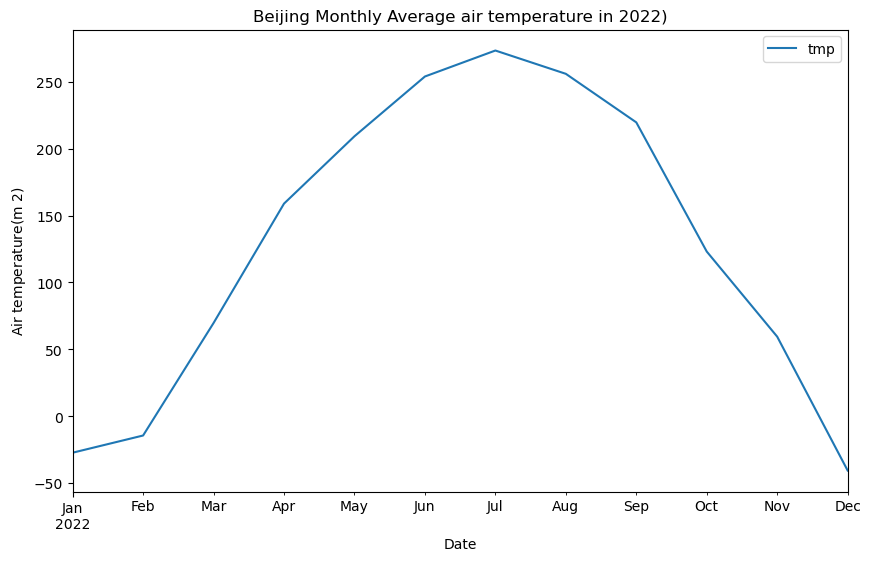

0       2022-01-01 00:00:00
1       2022-01-01 00:00:00
2       2022-01-01 00:30:00
3       2022-01-01 01:00:00
4       2022-01-01 01:30:00
                ...        
20242   2022-12-31 21:30:00
20243   2022-12-31 22:00:00
20244   2022-12-31 22:30:00
20245   2022-12-31 23:00:00
20246   2022-12-31 23:30:00
Name: DATE, Length: 20242, dtype: datetime64[ns]

In [19]:
# Plot the data
plt.figure(figsize=(10, 6))
tmp_mon['tmp'].plot()
plt.xlabel('Date')
plt.ylabel('Air temperature(m$~2$)')
plt.title('Beijing Monthly Average air temperature in 2022)')
plt.legend()
plt.show()
bj_df['DATE'] 


In [20]:
#3.3
# Load file
bj_df = pd.read_csv('54511099999.csv')

#Separate the TMP columns with commas to form multiple columns of air temperature related data.
bj_tmp = bj_df['TMP'].str.split(',',expand=True)
bj_tmp.columns = ['tmp','tmpq']
bj_df = pd.concat([bj_df,bj_tmp], axis=1)
bj_df = bj_df.drop('TMP',axis=1)
bj_df['tmp'] = bj_df['tmp'].str.slice(0, 5).astype(float)

# Filter the data
bj_df = bj_df.loc[bj_df['tmp'] != 9999]

# Convert date to datetime
bj_df['DATE'] = pd.to_datetime(bj_df['DATE'], format="%Y-%m-%dT%H:%M:%S")
bj_df=bj_df[['DATE','tmp','tmpq']]

# Set date as index
bj_df

/tmp/ipykernel_403041/3338919326.py:3: DtypeWarning: Columns (19,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  bj_df = pd.read_csv('54511099999.csv')


,DATE,tmp,tmpq
0,2022-01-01 00:00:00,-64.0,1
1,2022-01-01 00:00:00,-80.0,1
2,2022-01-01 00:30:00,-50.0,1
3,2022-01-01 01:00:00,-20.0,1
4,2022-01-01 01:30:00,-20.0,1
...,...,...,...
20242,2022-12-31 21:30:00,-70.0,1
20243,2022-12-31 22:00:00,-110.0,1
20244,2022-12-31 22:30:00,-110.0,1
20245,2022-12-31 23:00:00,-120.0,1


In [21]:
# 1 Calculate the average annual air temperature in Beijing
ann_avg=bj_df['tmp'].mean()/10
ann_avg

12.923396897539769

In [22]:
# 2 Calculate the annual maximum air temperature in Beijing
max_avg=bj_df['tmp'].max()/10
max_avg


38.4

In [23]:
# 3 Calculate the daily minimum air temperature in Beijing
min_avg=bj_df['tmp'].min()/10
min_avg

-16.0

In [24]:
# 4 Calculate the variance of annual average temperature in Beijing
bj_cels=bj_df['tmp']/10
var_avg=bj_cels.var()
var_avg

154.64201666070477

In [25]:
# 5 Calculate the number of days with a temperature above 35 degrees
bj_df.loc[bj_df['tmp']>350].count()

DATE    116
tmp     116
tmpq    116
dtype: int64

### 第三题代码输出结果正确，也在报告中展现了输出结果。但没有给出相应分析
### 得分14/15
